In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from collections import defaultdict

In [99]:
from src import calc_cocoa as cc
reload(cc)

orig_data = cc.load_all_data('src/files_list_auto.txt')
fix_data = cc.load_all_data('src/files_list_fix.txt')
style2chat_dict = cc.get_style2chat(orig_data)
fix_style2chat_dict = cc.get_style2chat(fix_data)

read all qual tsvs
read all chat jsons
read all lid tsvs
read all qual tsvs
read all chat jsons
read all lid tsvs


In [73]:
# AUTO
all_data = {}
for style, chat_list in style2chat_dict.iteritems():
#     print '*'*10
#     print style
#     print '*'*10
    all_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex'], all_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex_soc'], all_data)
print 'DONE collecting CM metrics into all_data'

DONE collecting CM metrics into all_data


In [74]:
cc.viz_general(all_data)

----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	517	59	49	62	49	63	57	58	74	46
% dial w/ cm	0.75	0.75	0.80	0.77	0.76	0.67	0.77	0.74	0.74	0.78
# utts   	4080	451	367	426	422	508	424	548	605	329
avg utts	7.89	7.64	7.49	6.87	8.61	8.06	7.44	9.45	8.18	7.15
# tokens	24856	2792	2224	2947	2423	2777	2668	3310	3828	1887
avg tokens	6.09	6.19	6.06	6.92	5.74	5.47	6.29	6.04	6.33	5.74

# CM  utt	1693	183	134	222	153	207	180	212	260	142
% CM  utt	0.41	0.41	0.37	0.52	0.36	0.41	0.42	0.39	0.43	0.43
# spa utt	1885	214	183	160	172	231	192	275	305	153
% spa utt	0.46	0.47	0.50	0.38	0.41	0.45	0.45	0.50	0.50	0.47
# eng utt	389	47	40	35	85	44	46	42	28	22
% eng utt	0.10	0.10	0.11	0.08	0.20	0.09	0.11	0.08	0.05	0.07

m idx   	0.76	0.88	0.68	0.90	0.98	0.84	0.81	0.69	0.51	0.53
i idx   	0.25	0.23	0.25	0.28	0.26	0.22	0.24	0.26	0.24	0.28


In [100]:
# FIX
fix_all_data = {}
for style, chat_list in fix_style2chat_dict.iteritems():
#     print '*'*10
#     print style
#     print '*'*10
    fix_all_data[style] = cc.get_general_cm_metrics(chat_list, fix_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex'], all_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex_soc'], all_data)
print 'DONE collecting CM metrics into all_data'

DONE collecting CM metrics into all_data


In [95]:
cc.viz_general(fix_all_data)

----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	517	59	49	62	49	63	57	58	74	46
% dial w/ cm	0.74	0.75	0.80	0.76	0.76	0.65	0.77	0.74	0.73	0.78
# utts   	4080	451	367	426	422	508	424	548	605	329
avg utts	7.89	7.64	7.49	6.87	8.61	8.06	7.44	9.45	8.18	7.15
# tokens	24856	2792	2224	2947	2423	2777	2668	3310	3828	1887
avg tokens	6.09	6.19	6.06	6.92	5.74	5.47	6.29	6.04	6.33	5.74

# CM  utt	1684	179	135	220	153	202	179	218	255	143
% CM  utt	0.41	0.40	0.37	0.52	0.36	0.40	0.42	0.40	0.42	0.43
# spa utt	1865	212	181	160	168	226	192	269	303	154
% spa utt	0.46	0.47	0.49	0.38	0.40	0.44	0.45	0.49	0.50	0.47
# eng utt	442	54	41	38	90	72	48	42	34	23
% eng utt	0.11	0.12	0.11	0.09	0.21	0.14	0.11	0.08	0.06	0.07

m idx   	0.77	0.89	0.69	0.91	0.99	0.89	0.83	0.69	0.51	0.53
i idx   	0.25	0.23	0.26	0.28	0.26	0.22	0.24	0.26	0.23	0.28


In [147]:
reload(cc)
print len(first_chatids)
# cc.predict_success(fix_data, fix_all_data, first_chatids)
cc.predict_success(fix_data, fix_all_data)

263
             precision    recall  f1-score   support

  no friend       0.52      0.31      0.39        36
     friend       0.68      0.84      0.75        62

avg / total       0.62      0.64      0.62        98

WEIGHTS
sp_lex -4257835314279.59
en_lex -4257835314279.307
sp2en -4257835314279.1357
en2sp -4257835314278.9346
sp_lex_soc -4257835314278.9077
en_lex_soc -4257835314279.1807
sp2en_soc -4257835314279.583
en2sp_soc -4257835314279.1226
random -4257835314279.102
sp_lex 1420001259906.0261
en_lex -750609279804.3577
sp2en -50020739240.7657
en2sp -1.1095898075611747e-07
neither 2.9286224024232073e-12
spa -0.21924757757954397
eng -0.39891894332262723
unk 0.6249439670623046
entrain_1x 0.0
********************

             precision    recall  f1-score   support

  no friend       0.48      0.45      0.47        33
     friend       0.73      0.75      0.74        65

avg / total       0.65      0.65      0.65        98

WEIGHTS
sp_lex 18284323240154.05
en_lex 18284323240154.22
sp2

In [24]:
for i in all_data['random']['style_utt']['c-0']:
    print i

tienes un amigo que trabaje en home
no tienes ninguno trabajando en el dance studio ?
tines un amigo que le guste the photography ?
no tengo ningun amigo que estudie nursing
que le guste camping ?
que le guste camping ?
tengo un friend que estudia farmacia que le gusta leer y un otro que le gusta dibujar
yo no pero tengo dos amigos que estudien librarianship , un que le gustan los deportes y el otro que le gustan los videojuegos
me too !
me too
me too
si tengo amigos que estudiaron japanese
si tengo amigos que le gustan fishing
tengo un amigo que estudio eso y le gusta drawing
tengo un que es real estate agent , likes sewing , y le gusta la noche
mi friend que le gusta dibujar , trabaja de linguistics
o spanish ?
al que le gusta camping estudio education
yo tengo un amigo q le gusta leer y tu tienes amigos que les gusta acting ?
usted tiene ammigos que les gusta engineering ?
si tengo amigos que work en el courthouse
me too
no tengo ningun amigo que estudio cartografia ni pharmacy
si t

In [97]:
reload(cc)

<module 'src.calc_cocoa' from 'src/calc_cocoa.py'>

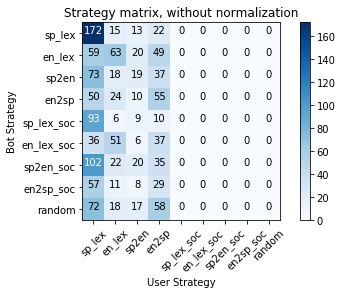

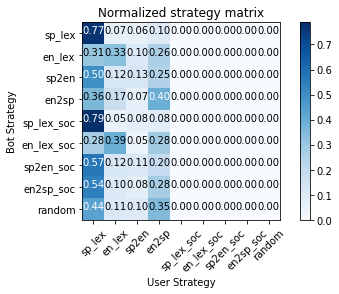

In [35]:
# cc.viz_cm_style(all_data, is_social=False)
# cc.viz_cm_style(all_data, is_social=True)
cc.viz_cm_style(all_data, is_social=2)
# cc.viz_cm_style(all_data, is_social=1)

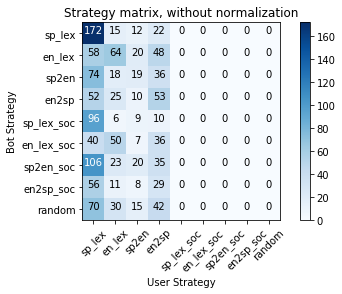

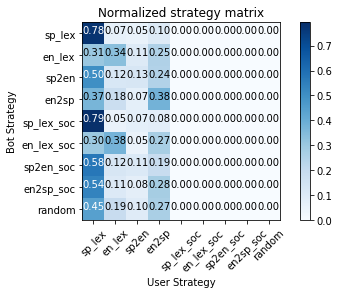

In [91]:
cc.viz_cm_style(fix_all_data, is_social=2)

In [7]:
for i in all_data['sp2en']['style_utt']['s-0']:
    print i

me too , yes i have 2 friends who likes la jardineria
tienes uno que majored in urban planning ?
nop el que works in the clinic le gusta la manana   studied biology that 's our common friend
no tengo ningun amigo que estudio ingenieria and i have one friend who works at the clinic
tienes algun amigo que estudio quimica or who likes traveling ?
no tengo ningun amigo que estudio espanol and i have one friend who works in a factory
tienes algun amigo que le guste la filosofia and whiting ?
ese no es one of my friends
si tambien tengo un amigo que estudio arte , pero no trabaja in the hair salon
yo tengo 2 amigos a los que le gusta la fotogragia y and five who likes the night
tengo 4 amigos especializados en contabilidad and two who likes baking
no tengo ningun amigo que estudio arquitectura but i have 5 who like afternoon
tienes algun amigo que estudio japones or who likes sports ?
si , tengo 4 amigos que estudiaron contabilidad and i do n't have any friends who likes singing
tienes algun

# Examine MTurk vs Figure 8

In [36]:
# create dict where key='mturk'/'fig8'/'none', value is chat_list

platform2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        worker_id = chat_dict['worker_id']
        if worker_id.startswith('A'):
            platform = 'mturk'
        elif worker_id == '[none]':
            platform = 'none'
        else:
            platform = 'fig8'
    except:
        ctr += 1
        continue
        
    platform2chat[platform].append(chat_id)
    
print '[non-survey]:', ctr
for platform, chat_list in platform2chat.iteritems():
    print '{}\t{}'.format(platform, len(chat_list))

[non-survey]: 47
none	18
mturk	217
fig8	323


In [84]:
from src import cm_metrics
reload(cm_metrics)
reload(cc)

<module 'src.calc_cocoa' from 'src/calc_cocoa.pyc'>

**********
mturk
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	211	22	19	28	20	27	25	20	28	22
% dial w/ cm	0.89	0.86	1.00	0.86	0.95	0.85	0.88	0.90	0.93	0.82
# utts   	1951	197	168	222	210	307	192	209	273	173
avg utts	9.25	8.95	8.84	7.93	10.50	11.37	7.68	10.45	9.75	7.86
# tokens	12827	1440	1139	1549	1381	1787	1228	1460	1797	1046
avg tokens	6.57	7.31	6.78	6.98	6.58	5.82	6.40	6.99	6.58	6.05

# CM  utt	925	95	72	131	97	151	83	93	118	85
% CM  utt	0.47	0.48	0.43	0.59	0.46	0.49	0.43	0.44	0.43	0.49
# spa utt	857	87	72	82	79	123	95	100	142	77
% spa utt	0.44	0.44	0.43	0.37	0.38	0.40	0.49	0.48	0.52	0.45
# eng utt	134	13	23	6	31	23	13	9	11	5
% eng utt	0.07	0.07	0.14	0.03	0.15	0.07	0.07	0.04	0.04	0.03

m idx   	0.76	0.85	0.73	0.91	0.99	0.87	0.73	0.77	0.46	0.49
i idx   	0.29	0.26	0.31	0.31	0.36	0.30	0.28	0.28	0.27	0.26


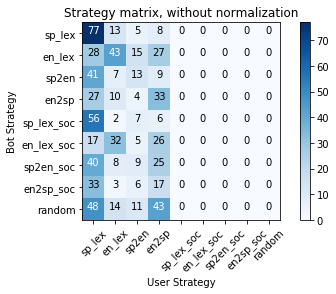

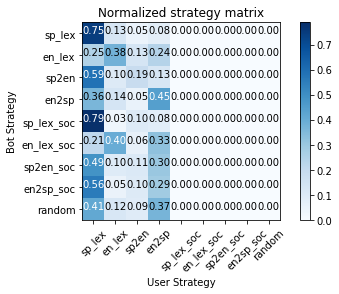

**********
fig8
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	259	31	26	29	23	31	28	33	36	22
% dial w/ cm	0.66	0.65	0.65	0.72	0.70	0.52	0.68	0.67	0.64	0.77
# utts   	1817	214	162	186	157	169	207	306	263	153
avg utts	7.02	6.90	6.23	6.41	6.83	5.45	7.39	9.27	7.31	6.95
# tokens	10278	1167	890	1260	833	760	1341	1620	1584	823
avg tokens	5.66	5.45	5.49	6.77	5.31	4.50	6.48	5.29	6.02	5.38

# CM  utt	660	76	53	83	50	41	91	103	107	56
% CM  utt	0.36	0.36	0.33	0.45	0.32	0.24	0.44	0.34	0.41	0.37
# spa utt	869	101	88	70	63	98	82	161	132	74
% spa utt	0.48	0.47	0.54	0.38	0.40	0.58	0.40	0.53	0.50	0.48
# eng utt	225	32	13	28	40	17	32	31	15	17
% eng utt	0.12	0.15	0.08	0.15	0.25	0.10	0.15	0.10	0.06	0.11

m idx   	0.76	0.95	0.67	0.93	0.99	0.65	0.90	0.61	0.55	0.60
i idx   	0.22	0.22	0.21	0.25	0.20	0.15	0.20	0.24	0.19	0.33


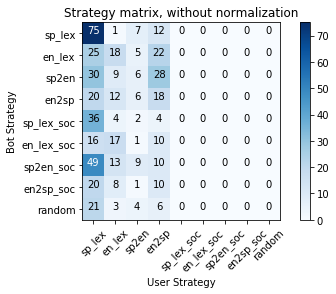

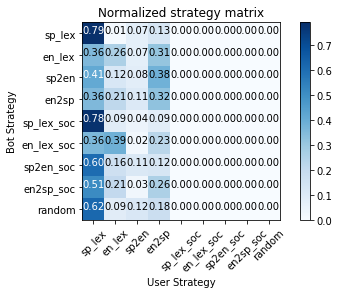

In [37]:
# compare visualizations of styles between MTURK & FIG8
# intersect platform2chat and style2chat chat_id lists

for platform, plat_chat_list in platform2chat.iteritems():
    if platform == 'none':
        continue
        
    print '*'*10
    print platform
    print '*'*10
    plat_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in plat_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
        plat_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
        
    cc.viz_general(plat_data)
    cc.viz_cm_style(plat_data)

## Get first-time workers
For more "raw" chats? So they haven't gamed the system yet

In [128]:
first_chatids = []
workers_dct = {}
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    if not 'submit' in orig_data[chat_id]:
        ctr += 1
        continue

    submit_time = orig_data[chat_id]['submit']
    worker = orig_data[chat_id]['worker_id']
    if worker not in workers_dct:
        workers_dct[worker] = (submit_time, chat_id)
    elif submit_time < workers_dct[worker][0]:
        workers_dct[worker] = (submit_time, chat_id)
    else:
#         print 'repeat worker'
        pass

first_chatids = [items[1] for workers, items in workers_dct.iteritems()]
print len(first_chatids)
print 'NOT IN QUAL TSV:', ctr
# print
# print workers_dct

263
NOT IN QUAL TSV: 47


In [56]:
times = ['08-10 23:47:17', '08-10 13:41:57', '08-11 01:28:21']
print times[0] < times[1]
print sorted(times)

False
['08-10 13:41:57', '08-10 23:47:17', '08-11 01:28:21']


# Examine across Task Success

In [38]:
# create dict where key=0/1, value is chat_list

success2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        outcome = int(chat_dict['outcome'])
    except:
        ctr += 1
        continue
        
    success2chat[outcome].append(chat_id)
    
print '[neither]:', ctr
for outcome, chat_list in success2chat.iteritems():
    print '{}\t{}'.format(outcome, len(chat_list))

[neither]: 47
0	184
1	374


**********
0
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	181	13	17	22	16	21	14	31	37	10
% dial w/ cm	0.83	0.85	0.82	0.91	0.94	0.90	0.79	0.77	0.76	0.80
# utts   	2043	144	190	228	201	252	136	380	397	115
avg utts	11.29	11.08	11.18	10.36	12.56	12.00	9.71	12.26	10.73	11.50
# tokens	12811	896	1208	1730	1231	1347	905	2268	2492	734
avg tokens	6.27	6.22	6.36	7.59	6.12	5.35	6.65	5.97	6.28	6.38

# CM  utt	857	60	72	141	68	103	63	149	152	49
% CM  utt	0.42	0.42	0.38	0.62	0.34	0.41	0.46	0.39	0.38	0.43
# spa utt	943	58	95	73	79	111	64	187	223	53
% spa utt	0.46	0.40	0.50	0.32	0.39	0.44	0.47	0.49	0.56	0.46
# eng utt	206	25	19	12	53	28	9	32	18	10
% eng utt	0.10	0.17	0.10	0.05	0.26	0.11	0.07	0.08	0.05	0.09

m idx   	0.75	0.99	0.63	0.89	0.97	0.85	0.65	0.69	0.46	0.61
i idx   	0.26	0.25	0.23	0.34	0.24	0.28	0.26	0.28	0.20	0.23


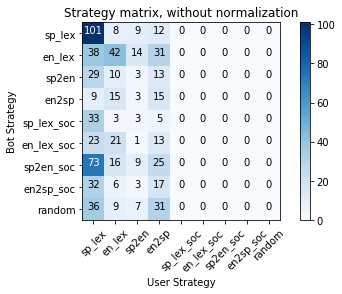

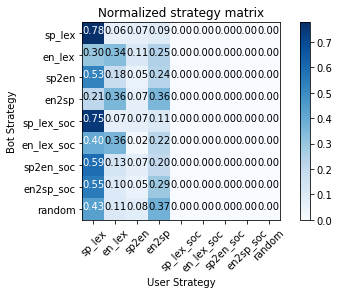

**********
1
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	306	42	30	36	28	38	40	25	33	34
% dial w/ cm	0.73	0.71	0.80	0.72	0.75	0.55	0.78	0.76	0.76	0.79
# utts   	1895	290	171	189	179	230	267	164	194	211
avg utts	6.19	6.90	5.70	5.25	6.39	6.05	6.67	6.56	5.88	6.21
# tokens	11339	1817	991	1160	1061	1215	1674	1036	1250	1135
avg tokens	5.98	6.27	5.80	6.14	5.93	5.28	6.27	6.32	6.44	5.38

# CM  utt	799	118	61	79	82	91	112	63	101	92
% CM  utt	0.42	0.41	0.36	0.42	0.46	0.40	0.42	0.38	0.52	0.44
# spa utt	871	144	84	81	73	114	114	85	78	98
% spa utt	0.46	0.50	0.49	0.43	0.41	0.50	0.43	0.52	0.40	0.46
# eng utt	162	22	21	23	18	12	37	9	8	12
% eng utt	0.09	0.08	0.12	0.12	0.10	0.05	0.14	0.05	0.04	0.06

m idx   	0.76	0.75	0.75	0.93	0.99	0.75	0.90	0.67	0.56	0.49
i idx   	0.25	0.23	0.26	0.24	0.29	0.19	0.24	0.23	0.27	0.31


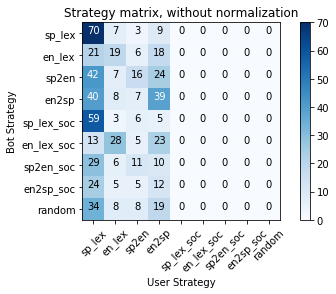

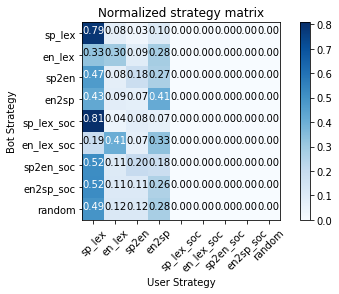

In [39]:
# compare visualizations of styles between Success = 0 or 1
# intersect success2chat and style2chat chat_id lists

for outcome, out_chat_list in success2chat.iteritems():
    print '*'*10
    print outcome
    print '*'*10
    out_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in out_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
        out_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
        
    cc.viz_general(out_data)
    cc.viz_cm_style(out_data)

In [65]:
# Which CM strategies result in better Success?
# toggle first_only variable (repeat workers may have better Success independent of BOT)

first_only = True
out_data = {}
for outcome, out_chat_list in success2chat.iteritems():
#     print '*'*10
#     print outcome
#     print '*'*10
    for chat_id in out_chat_list:
        if chat_id not in orig_data:
            print 'oh no'
            continue
            
        # filter: only use first-time chats
        if first_only:
            if chat_id not in first_chatids:
                continue
            
        bot_style = orig_data[chat_id]['style']
        if bot_style not in out_data:
            out_data[bot_style] = defaultdict(int)
        out_data[bot_style][outcome] += 1
        
zeros = sum([out_data[style][0] for style in out_data])
ones = sum([out_data[style][1] for style in out_data])
success_rate = float(ones) / (zeros + ones)
print '{}\t{}\t{}\t{:.2f}'.format('TOTAL'.ljust(10), zeros, ones, success_rate)
        
for style in sorted(out_data.keys()):
    zero = out_data[style][0]
    one = out_data[style][1]
    success_rate = float(one) / (zero + one)
    print '{}\t{}\t{}\t{:.2f}'.format(style.ljust(10), zero, one, success_rate)

TOTAL     	96	167	0.63
en2sp     	10	25	0.71
en2sp_soc 	9	14	0.61
en_lex    	12	22	0.65
en_lex_soc	9	16	0.64
random    	7	10	0.59
sp2en     	8	29	0.78
sp2en_soc 	16	12	0.43
sp_lex    	19	24	0.56
sp_lex_soc	6	15	0.71


# Remove dialogues of < 3 utterances
Doesn't seem to do much...

In [24]:
greaterthan2chat = []
ctr = 0
short = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        outcome = len(chat_dict['lbl_dict'])
        if outcome > 4:
            greaterthan2chat.append(chat_id)
        else:
            short += 1
    except:
        ctr += 1
   
print '[neither]:', ctr
print 'Short\t{}'.format(short)
print 'Long\t{}'.format(len(greaterthan2chat))

[neither]: 52
Short	119
Long	246


----------	total	en2sp	en2sp_s	en_lex	en_lex_	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	246	32	24	31	28	32	38	42	19
% dial w/ cm	0.88	0.88	0.88	0.94	0.86	0.97	0.79	0.88	0.84
# utts   	2602	340	254	302	310	326	414	460	196
avg utts	10.58	10.62	10.58	9.74	11.07	10.19	10.89	10.95	10.32
# tokens	16024	2130	1487	2061	1764	2017	2476	2985	1104
avg tokens	6.16	6.26	5.85	6.82	5.69	6.19	5.98	6.49	5.63

# CM  utt	1073	142	89	164	102	141	157	196	82
% CM  utt	0.41	0.42	0.35	0.54	0.33	0.43	0.38	0.43	0.42
# spa utt	1239	155	126	120	144	144	214	240	96
% spa utt	0.48	0.46	0.50	0.40	0.46	0.44	0.52	0.52	0.49
# eng utt	240	38	34	14	57	37	28	21	11
% eng utt	0.09	0.11	0.13	0.05	0.18	0.11	0.07	0.05	0.06

m idx   	0.73	0.89	0.72	0.87	0.94	0.83	0.63	0.50	0.47
i idx   	0.27	0.27	0.27	0.33	0.24	0.26	0.27	0.25	0.23
NOT Normalized
[[134  12   7  13]
 [ 45  49  14  34]
 [ 63  13  13  25]
 [ 38  16   8  43]]
Normalized
[[0.81 0.07 0.04 0.08]
 [0.32 0.35 0.1  0.24]
 [0.55 0.11 0.11 0.22]
 [0.36 0.15 0.08 0.41]]


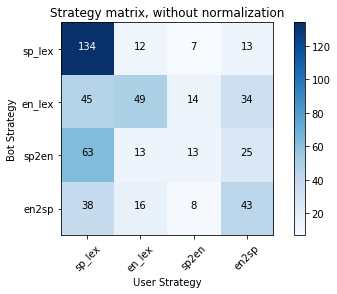

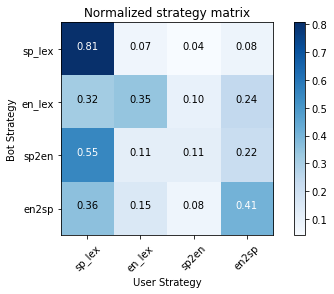

NOT Normalized
[[56  1  4  6]
 [31 30  5 18]
 [89 15 13 25]
 [37  9  4 20]]
Normalized
[[0.84 0.01 0.06 0.09]
 [0.37 0.36 0.06 0.21]
 [0.63 0.11 0.09 0.18]
 [0.53 0.13 0.06 0.29]]


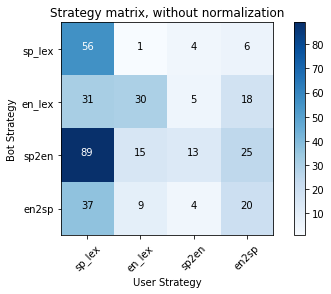

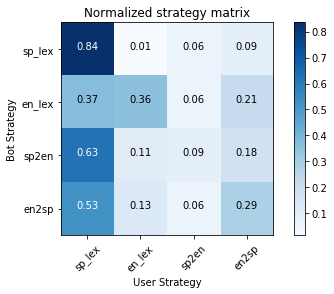

In [27]:
# visualize for "longer" chats

long_data = {}
for style, style_chat_list in style2chat_dict.iteritems():
    chat_list = [chat_id for chat_id in greaterthan2chat if chat_id in style_chat_list]
    if not chat_list:
        print 'OH NO'
    long_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)

cc.viz_general(long_data)
cc.viz_cm_style(long_data, is_social=False)
cc.viz_cm_style(long_data, is_social=True)

# Examine across reported Gender

* women speak avg 1 more utt per dialogue than men
* similar proportion of dialogues w/ CM, % CM utterances
* women have slightly higher m-idx, slightly lower i-idx
* ratio of women is ~ 40% 

In [68]:
# create dict where key=0/1, value is chat_list

gender2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    # FIRST ONLY
    if chat_id not in first_chatids:
        continue
    try:
        outcome = chat_dict['n00_gender']
    except:
        ctr += 1
        continue
        
    gender2chat[outcome].append(chat_id)
    
print '[neither]:', ctr
for outcome, chat_list in gender2chat.iteritems():
    print '{}\t{}'.format(outcome, len(chat_list))

[neither]: 0
m	152
o	4
f	107


**********
m
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	134	13	11	20	15	5	18	14	23	15
% dial w/ cm	0.71	0.46	0.91	0.80	0.67	0.80	0.78	0.64	0.74	0.60
# utts   	1038	97	76	133	90	65	129	112	212	124
avg utts	7.75	7.46	6.91	6.65	6.00	13.00	7.17	8.00	9.22	8.27
# tokens	5994	520	488	768	544	309	807	596	1301	661
avg tokens	5.77	5.36	6.42	5.77	6.04	4.75	6.26	5.32	6.14	5.33

# CM  utt	355	22	23	53	33	15	50	35	84	40
% CM  utt	0.34	0.23	0.30	0.40	0.37	0.23	0.39	0.31	0.40	0.32
# spa utt	548	64	39	57	32	44	71	56	118	67
% spa utt	0.53	0.66	0.51	0.43	0.36	0.68	0.55	0.50	0.56	0.54
# eng utt	114	10	10	22	24	4	7	18	7	12
% eng utt	0.11	0.10	0.13	0.17	0.27	0.06	0.05	0.16	0.03	0.10

m idx   	0.62	0.65	0.66	0.95	0.98	0.23	0.63	0.52	0.38	0.55
i idx   	0.22	0.15	0.26	0.26	0.21	0.17	0.24	0.23	0.19	0.27


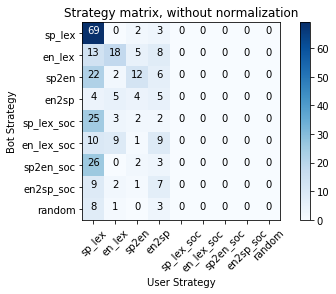

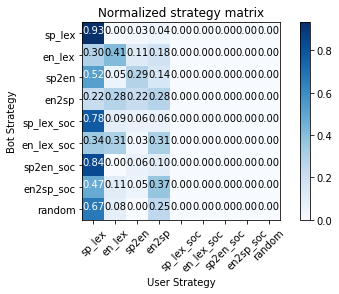

**********
f
**********
----------	total	en2sp	en2sp_s	en_lex	en_lex_	random	sp2en	sp2en_s	sp_lex	sp_lex_
# dialogues	98	16	10	10	8	8	13	13	15	5
% dial w/ cm	0.73	0.75	0.70	0.60	0.88	1.00	0.69	0.69	0.73	0.60
# utts   	789	112	63	68	79	71	92	151	115	38
avg utts	8.05	7.00	6.30	6.80	9.88	8.88	7.08	11.62	7.67	7.60
# tokens	5002	887	411	476	637	309	481	865	761	175
avg tokens	6.34	7.92	6.52	7.00	8.06	4.35	5.23	5.73	6.62	4.61

# CM  utt	289	45	25	34	34	30	33	46	34	8
% CM  utt	0.37	0.40	0.40	0.50	0.43	0.42	0.36	0.30	0.30	0.21
# spa utt	406	46	30	33	24	38	46	93	74	22
% spa utt	0.51	0.41	0.48	0.49	0.30	0.54	0.50	0.62	0.64	0.58
# eng utt	81	21	6	1	21	2	12	7	5	6
% eng utt	0.10	0.19	0.10	0.01	0.27	0.03	0.13	0.05	0.04	0.16

m idx   	0.69	0.96	0.87	0.64	1.00	0.61	0.81	0.43	0.51	0.38
i idx   	0.21	0.19	0.19	0.20	0.26	0.31	0.21	0.20	0.20	0.14


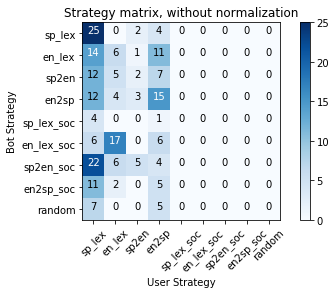

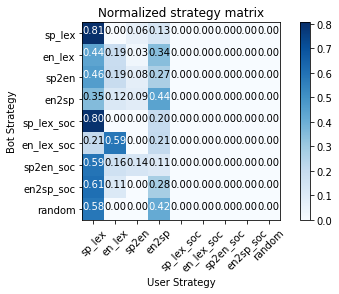

In [69]:
# compare visualizations of styles between Success = 0 or 1
# intersect success2chat and style2chat chat_id lists

for outcome, out_chat_list in gender2chat.iteritems():
    if outcome == 'o':
        continue
    print '*'*10
    print outcome
    print '*'*10
    out_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in out_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
            continue
        out_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
        
    cc.viz_general(out_data)
    cc.viz_cm_style(out_data)